<a href="https://colab.research.google.com/github/sreeraj-menon-98/S4-Data-Structures-and-Algorithms/blob/master/Sart%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install pydicom


     |████████████████████████████████| 35.3MB 90kB/s 


Mount Drive

In [0]:
from google.colab import drive
drive.flush_and_unmount()


Drive not mounted, so nothing to flush and unmount.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path ='/content/drive/My Drive/Major Project/Matlab/'

SART (6 iteration) rms reconstruction error: 1.82
FBP (1 iteration) rms reconstruction error: 3.21


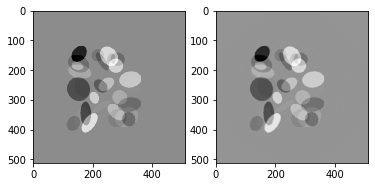

In [0]:
import numpy as np
import h5py
import scipy.io as sio
import matplotlib.pyplot as plt
from skimage.io import imsave,imread
from skimage.transform import radon, rescale,iradon_sart,iradon

x_name='GT'
x_dim=(512,512,1)
downfactor=100
ID=1

for ID in range(1,51):
  file_name = path+'Original/' +str(ID) + '.mat'
  try:
    with h5py.File(file_name, 'r') as f:
      x = np.reshape(f[x_name], x_dim)
  except OSError:
    f = sio.loadmat(file_name)
    x = np.reshape(f[x_name],x_dim)
  image=f[x_name]
  theta = np.linspace(0., 180., downfactor, endpoint=False)
  sinogram = radon(image, theta=theta)
  sart=iradon_sart(sinogram, theta=theta)
  fbp=iradon(sinogram, theta=theta)
  
  for i in range(1,6):
    sart = iradon_sart(sinogram, theta=theta,
                                    image=sart)
  error = sart - image
  print("SART (6 iteration) rms reconstruction error: "f"{np.sqrt(np.mean(error**2)):.3g}")

  error = fbp - image
  print("FBP (1 iteration) rms reconstruction error: "f"{np.sqrt(np.mean(error**2)):.3g}")

  fig,( ax1,ax2)=plt.subplots(1,2)
  ax1.imshow(image, cmap=plt.cm.Greys_r)
  ax2.imshow(sart, cmap=plt.cm.Greys_r)

  imsave(path+'SART/Sparse100/'+str(ID)+'.png',sart)

  break
  
  

Data Generation - Matlab



In [0]:
main(500);

function main(data_num)
h = 512; w =512;
HTheta = linspace(0,180,1000);
downsample_factor1 = 10;
downsample_factor2 = 20;
for id = 1:data_num
    GT = random_ellipse_generator(h, w);
    [HSino, HRecon, LSino1, LTheta1, LRecon1, LSino2, LTheta2, LRecon2] = generate_CT_data(GT, HTheta, downsample_factor1, downsample_factor2);
    file_name = strcat('Data/',num2str(id), '.mat');
    save(file_name, 'GT', 'HSino', 'HTheta', 'HRecon', 'LSino1', 'LTheta1', 'LRecon1', 'LSino2', 'LTheta2', 'LRecon2');
    disp(id);
end
end

function [HSino, HRecon, LSino1, LTheta1, LRecon1, LSino2, LTheta2, LRecon2] = generate_CT_data(img, theta, factor1, factor2)
HSino = radon(img, theta);
HRecon = iradon(HSino, theta, size(img,1));

LSino1 = HSino(:, 1:factor1:end);
LTheta1 = theta(:, 1:factor1:end);
LRecon1 = iradon(LSino1, LTheta1, size(img,1));

LSino2 = HSino(:, 1:factor2:end);
LTheta2 = theta(:, 1:factor2:end);
LRecon2 = iradon(LSino2, LTheta2, size(img,1));
end

function img = random_ellipse_generator(h, w)
[X,Y] = meshgrid(1:w, 1:h);
img = zeros(h,w);
e_num = randi([10,30]);
for i = 1:e_num
    gray_level = randi([-128, 128]);
    alpha = pi.*rand(1);
    center_x = randi([w/4, 3/4*w]);
    center_y = randi([w/4, 3/4*h]);
    e_a = randi([10,40]);
    e_b = randi([20,40]);
    mask = (((X-center_x)*cos(alpha)-(Y-center_y)*sin(alpha))./e_a).^2 + (((X-center_x)*sin(alpha)+(Y-center_y)*cos(alpha))./e_b).^2 < 1;
    %mask_1 = (((X-center_x)*cos(alpha)-(Y-center_y)*sin(alpha))./(e_a+1)).^2 + (((X-center_x)*sin(alpha)+(Y-center_y)*cos(alpha))./(e_b+1)).^2 <= 1;
    img(mask) = img(mask) + gray_level;
    %img(mask_1) = img(mask_1) + 0.3*gray_level;
end
img = conv2(single(img), ones(3)/9, 'same');
end

%sinogram = zeros(729, 1000);
% p = phantom(512);
% sinogram = radon(p, linspace(0,179,1000));
% recon = iradon(sinogram, linspace(0,179,1000), 512);
% theta = linspace(0,180,1000);
% img = random_ellipse_generator(512, 512);
% img_radon = radon(img, theta);
% img_recon = iradon(img_radon, theta, 512);
% downsample_factor = 20;
% img_radon_downsample = img_radon(:, 1:downsample_factor:end);
% downsample_theta = theta(1:downsample_factor:end);
% downsample_recon = iradon(img_radon_downsample, downsample_theta, 512);
% 
% figure
% imagesc(img);
% colormap(gray);
% 
% figure
% subplot(2,2,1);
% imagesc(img_radon);
% colormap(gray);
% 
% subplot(2,2,2);
% imagesc(img_recon);
% colormap(gray);
% 
% subplot(2,2,3);
% imagesc(img_radon_downsample);
% colormap(gray);
% 
% subplot(2,2,4);
% imagesc(downsample_recon);
% colormap(gray);

Load Data

In [0]:
import numpy as np
import h5py
import scipy.io as sio
from tensorflow import keras
from skimage.io import imread

class DataGenerator(keras.utils.Sequence):
    def __init__(self, list_IDs, data_dir, batch_size = 32, x_dim=(512,512,1), y_dim=(512,512,1), shuffle=True):
        self.list_IDs = list_IDs
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.shuffle = shuffle
        self.on_epoch_end()
    
    def __len__(self):
        return int(np.floor(len(self.list_IDs)/self.batch_size))
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    def __getitem__(self, index):
        batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        batch_IDs = [self.list_IDs[k] for k in batch_indexes]
        
        X, Y = self.__batch_data_generation(batch_IDs)
        
        return X,Y
    
    def __batch_data_generation(self, batch_IDs):
        X = np.empty((self.batch_size, *self.x_dim)) #* is used to unpack the self.dim tuple
        Y = np.empty((self.batch_size, *self.y_dim))
        
        for i, ID in enumerate(batch_IDs):
            X[i,:], Y[i,:] = self.load_mat(ID, 'LRecon2', 'GT')
            
        return X,Y
    
    def load_mat(self, ID, x_name, y_name):
        file_name = self.data_dir+'Original/' + str(ID) + '.mat'
        try:
            with h5py.File(file_name, 'r') as f:
                x = np.reshape(f[x_name], self.x_dim)
                y = np.reshape(f[y_name], self.y_dim)
        except OSError:
            f = sio.loadmat(file_name)
            x = np.reshape(f[x_name], self.x_dim)
            y = np.reshape(f[y_name], self.y_dim)
                    
        #sart=imread(self.data_dir+'/SART/Sparse100/'+str(ID)+'.png',0)
        #x = np.reshape(sart, self.y_dim)
        return x,y

if __name__ == '__main__':
    generator = DataGenerator(list(np.arange(1, 11)), path+'Data/ValidationData/')
    #print(generator.load_mat(5, 'LRecon1', 'GT'))

U-Net


In [0]:
import numpy as np
from tensorflow  import keras

def UNet(input_size, pretrained_weights = None):
    inputs = keras.Input(shape = input_size)
    
    #level 1
    conv64_1 = keras.layers.Conv2D(64, [3,3], [1,1], 'same', activation = 'relu')(inputs)
    conv64_1_BN = keras.layers.BatchNormalization()(conv64_1)
    conv64_2 = keras.layers.Conv2D(64, [3,3], [1,1], 'same', activation = 'relu')(conv64_1_BN)
    conv64_2_BN = keras.layers.BatchNormalization()(conv64_2)
    conv64_3 = keras.layers.Conv2D(64, [3,3], [1,1], 'same', activation = 'relu')(conv64_2_BN)
    conv64_3_BN = keras.layers.BatchNormalization()(conv64_3)
    
    #downsampling to level 2
    conv64_3_pool = keras.layers.MaxPool2D([2,2], padding = 'valid')(conv64_3_BN)
    conv128_1 = keras.layers.Conv2D(128, [3,3], [1,1], 'same', activation = 'relu')(conv64_3_pool)
    conv128_1_BN = keras.layers.BatchNormalization()(conv128_1)
    conv128_2 = keras.layers.Conv2D(128, [3,3], [1,1], 'same', activation = 'relu')(conv128_1_BN)
    conv128_2_BN = keras.layers.BatchNormalization()(conv128_2)
    
    #downsampling to level 3
    conv128_2_pool = keras.layers.MaxPool2D([2,2], padding = 'valid')(conv128_2_BN)
    conv256_1 = keras.layers.Conv2D(256, [3,3], [1,1], 'same', activation = 'relu')(conv128_2_pool)
    conv256_1_BN = keras.layers.BatchNormalization()(conv256_1)
    conv256_2 = keras.layers.Conv2D(256, [3,3], [1,1], 'same', activation = 'relu')(conv256_1_BN)
    conv256_2_BN = keras.layers.BatchNormalization()(conv256_2)
    
    #downsampling to level 4
    conv256_2_pool = keras.layers.MaxPool2D([2,2], padding = 'valid')(conv256_2_BN)
    conv512_1 = keras.layers.Conv2D(512, [3,3], [1,1], 'same', activation = 'relu')(conv256_2_pool)
    conv512_1_BN = keras.layers.BatchNormalization()(conv512_1)
    conv512_2 = keras.layers.Conv2D(512, [3,3], [1,1], 'same', activation = 'relu')(conv512_1_BN)
    conv512_2_BN = keras.layers.BatchNormalization()(conv512_2)
    
    #downsampling to level 5
    conv512_2_pool = keras.layers.MaxPool2D([2,2], padding = 'valid')(conv512_2_BN)
    conv1024_1 = keras.layers.Conv2D(1024, [3,3], [1,1], 'same', activation = 'relu')(conv512_2_pool)
    conv1024_1_BN = keras.layers.BatchNormalization()(conv1024_1)
    conv1024_2 = keras.layers.Conv2D(1024, [3,3], [1,1], 'same', activation = 'relu')(conv1024_1_BN)
    conv1024_2_BN = keras.layers.BatchNormalization()(conv1024_2)
    
    #upsampling to level 4
    level4_ini = keras.layers.Conv2D(512, [3,3], [1,1], 'same', activation='relu')(keras.layers.UpSampling2D((2,2))(conv1024_2_BN))
    level4_ini_concat = keras.layers.concatenate([conv512_2_BN, level4_ini], axis = -1)
    conv512_1_up = keras.layers.Conv2D(512, [3,3], [1,1], 'same', activation = 'relu')(level4_ini_concat)
    conv512_1_BN_up = keras.layers.BatchNormalization()(conv512_1_up)
    conv512_2_up = keras.layers.Conv2D(512, [3,3], [1,1], 'same', activation = 'relu')(conv512_1_BN_up)
    conv512_2_BN_up = keras.layers.BatchNormalization()(conv512_2_up)
    
    #upsampling to level 3
    level3_ini = keras.layers.Conv2D(256, [3,3], [1,1], 'same', activation='relu')(keras.layers.UpSampling2D((2,2))(conv512_2_BN_up))
    level3_ini_concat = keras.layers.concatenate([conv256_2_BN, level3_ini], axis = -1)
    conv256_1_up = keras.layers.Conv2D(256, [3,3], [1,1], 'same', activation = 'relu')(level3_ini_concat)
    conv256_1_BN_up = keras.layers.BatchNormalization()(conv256_1_up)
    conv256_2_up = keras.layers.Conv2D(256, [3,3], [1,1], 'same', activation = 'relu')(conv256_1_BN_up)
    conv256_2_BN_up = keras.layers.BatchNormalization()(conv256_2_up)
    
    #upsampling to level 2
    level2_ini = keras.layers.Conv2D(128, [3,3], [1,1], 'same', activation='relu')(keras.layers.UpSampling2D((2,2))(conv256_2_BN_up))
    level2_ini_concat = keras.layers.concatenate([conv128_2_BN, level2_ini], axis = -1)
    conv128_1_up = keras.layers.Conv2D(128, [3,3], [1,1], 'same', activation = 'relu')(level2_ini_concat)
    conv128_1_BN_up = keras.layers.BatchNormalization()(conv128_1_up)
    conv128_2_up = keras.layers.Conv2D(128, [3,3], [1,1], 'same', activation = 'relu')(conv128_1_BN_up)
    conv128_2_BN_up = keras.layers.BatchNormalization()(conv128_2_up)
    
    #upsampling to level 1
    level1_ini = keras.layers.Conv2D(64, [3,3], [1,1], 'same', activation='relu')(keras.layers.UpSampling2D((2,2))(conv128_2_BN_up))
    level1_ini_concat = keras.layers.concatenate([conv64_3_BN, level1_ini], axis = -1)
    conv64_1_up = keras.layers.Conv2D(64, [3,3], [1,1], 'same', activation = 'relu')(level1_ini_concat)
    conv64_1_BN_up = keras.layers.BatchNormalization()(conv64_1_up)
    conv64_2_up = keras.layers.Conv2D(64, [3,3], [1,1], 'same', activation = 'relu')(conv64_1_BN_up)
    conv64_2_BN_up = keras.layers.BatchNormalization()(conv64_2_up)
    conv1_up = keras.layers.Conv2D(1, [1,1], [1,1], 'same')(conv64_2_BN_up)
    outputs = keras.layers.add([inputs, conv1_up])
    
    
    ###################################################################################
    model = keras.models.Model(inputs = inputs, outputs = outputs)
    if pretrained_weights:
        model.load_weights(pretrained_weights)
    
    return model

if __name__ == '__main__':
    model = UNet((512,512,1))
    #model.summary()
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')#, metrics = ['accuracy'])
    x = np.random.random((1,512,512,1))
    final_out = model.predict(x)
    print(np.shape(final_out))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


(1, 512, 512, 1)


Plotting Metrics and Loss

In [0]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        #self.acc = []
        #self.val_acc = []
        self.ssim=[]
        self.psnr=[]
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.ssim.append(logs.get('ssim_loss'))
        self.psnr.append(logs.get('psnr'))
        #self.acc.append(logs.get('acc'))
        #self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(16,8), sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.set_ylabel('MSE')
        ax1.set_xlabel('Epoch')
        ax1.legend()
        
        ax2.plot(self.x, self.ssim, label="ssim")
        ax2.set_ylabel('SSIM')
        ax2.set_xlabel('Epoch')
        ax2.legend()
        
        ax3.plot(self.x, self.psnr, label="psnr")
        ax3.set_ylabel('PSNR')
        ax3.set_xlabel('Epoch')
        ax3.legend()
    
        plt.savefig(path+'SART/'+'graph100.png')
        plt.show()

        
plot = PlotLearning()

Metrics For Evaluation






In [0]:
import tensorflow as tf
from keras import backend

 
# Structural Similarity Index
def ssim_loss(y_true, y_pred):
  return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 255))

# Peak Signal To Noise Ratio
def psnr(y_true, y_pred):
  return tf.reduce_mean(tf.image.psnr(y_true, y_pred, 255))


Using TensorFlow backend.


Training with matlab generated shapes




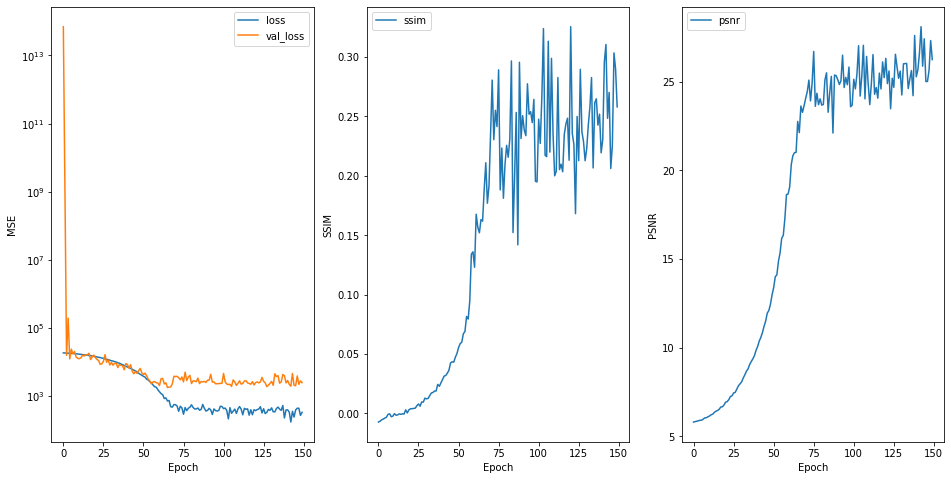

20/20 [==============================] - 12s 619ms/step - loss: 323.1979 - ssim_loss: 0.2580 - psnr: 26.2567 - val_loss: 2406.4427 - val_ssim_loss: 0.1063 - val_psnr: 18.2305


In [0]:


train_IDs = list(np.arange(1, 41))
val_IDs = list(np.arange(41, 51))
train_generator = DataGenerator(train_IDs, path, batch_size = 2)
val_generator = DataGenerator(val_IDs, path, batch_size = 2)

#tbCallBack = keras.callbacks.TensorBoard(log_dir = path+'TestTraining/logs', write_graph = True, write_images = True) #Tensorboard callback
#checkpoint_path = path+'TestTraining/checkpoints/test_cp.ckpt'
#cpCallBack = keras.callbacks.ModelCheckpoint(checkpoint_path) #checkpoints callBack

model = UNet((512,512,1))
#model.summary()
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = [ssim_loss,psnr])
history= model.fit_generator(train_generator, epochs = 150, validation_data = val_generator,
                    workers = 6, callbacks = [plot])#,tbCallBack, cpCallBack])

Save Model

In [0]:
model.save(path+'SART/'+"modelsart100.h5")

Load Model from Disk

In [0]:
from tensorflow.keras.models import load_model
dependencies={
    'ssim_loss':ssim_loss,
    'psnr':psnr
}
# load model
model = load_model(path+'FBP/'+'modelfbp100.h5',custom_objects=dependencies)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
gen=DataGenerator(np.arange(1,11),path, batch_size = 1)

print("Image    B/w recon and original    b/w predicted and original")

for i in range(1,11):
  x,y=gen.load_mat(i,'LRecon1','GT')
  pre=model.predict([[x]])
  with tf.Session() as sess:
    print(str(i)+"        "+str(psnr(x,y).eval())+"           "+str(psnr(pre,y).eval()))


Image    B/w recon and original    b/w predicted and original
1        36.717873           56.092403
2        35.320908           54.75299
3        34.853477           53.663048
4        38.969666           59.888584
5        34.09677           53.130665
6        38.330765           57.46241
7        35.993237           56.475853
8        36.341026           56.541447
9        34.640423           54.22268
10        35.00132           54.648033


Evaluation of Model

In [0]:
val_generator = DataGenerator(np.arange(1,11), path+'Original/', batch_size = 1)

print(model.evaluate_generator(val_generator,1))
print(model.metrics_names)



[0.21766133606433868, 0.99689716, 54.75299]
['loss', 'ssim_loss', 'psnr']


In [0]:

gen=DataGenerator(np.arange(1,11),path+'Data/ValidationData/', batch_size = 1)

i=1
while(i<11):
  x,y=gen.load_mat(i,'LRecon1','GT')
  print(model.evaluate([[x,]],[[y,]]))
  i=i+1

1/1 [==============================] - 0s 181ms/sample - loss: 0.5144 - ssim_loss: 0.9957 - psnr: 51.0176
[0.514419436454773, 0.995748, 51.017628]
1/1 [==============================] - 0s 149ms/sample - loss: 0.2771 - ssim_loss: 0.9971 - psnr: 53.7046
[0.27708810567855835, 0.99714094, 53.704624]
1/1 [==============================] - 0s 117ms/sample - loss: 0.3987 - ssim_loss: 0.9969 - psnr: 52.1243
[0.3987044394016266, 0.9968846, 52.12429]
1/1 [==============================] - 0s 116ms/sample - loss: 0.3339 - ssim_loss: 0.9971 - psnr: 52.8951
[0.3338664174079895, 0.99705744, 52.895073]
1/1 [==============================] - 0s 116ms/sample - loss: 0.4555 - ssim_loss: 0.9966 - psnr: 51.5456
[0.4555308222770691, 0.9966042, 51.545624]
1/1 [==============================] - 0s 117ms/sample - loss: 0.5108 - ssim_loss: 0.9964 - psnr: 51.0484
[0.5107837319374084, 0.9963743, 51.04843]
1/1 [==============================] - 0s 121ms/sample - loss: 0.3254 - ssim_loss: 0.9966 - psnr: 53.0062
[

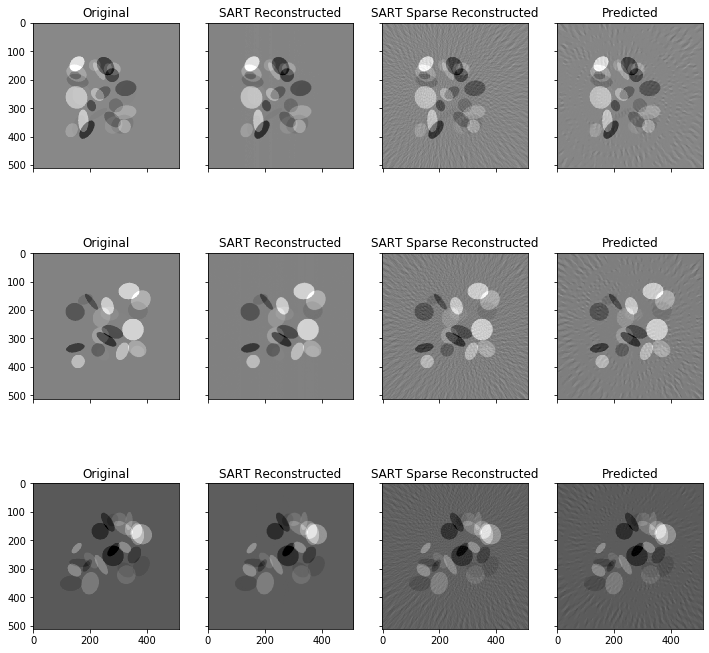

In [0]:
import matplotlib.pyplot as plt

n=3
gen=DataGenerator(np.arange(1,n+1),path+'Original/', batch_size = 1)

fig,ax=plt.subplots(n,4,figsize=(12,12),sharex=True,sharey=True)

i=1
while(i<n+1):
  gt,hrecon=gen.load_mat(i,'GT','HRecon')
  gt1,lrecon1=gen.load_mat(i,'GT','LRecon2')

 
  pre=model.predict([[lrecon1]])
  
  ax[i-1][0].imshow(np.squeeze(gt), cmap=plt.cm.binary)
  ax[i-1][0].set_title('Original')

  ax[i-1][1].imshow(np.squeeze(hrecon), cmap=plt.cm.binary)
  ax[i-1][1].set_title('SART Reconstructed')

  ax[i-1][2].imshow(np.squeeze(lrecon1), cmap=plt.cm.binary)
  ax[i-1][2].set_title('SART Sparse Reconstructed')

  ax[i-1][3].imshow(np.squeeze(pre), cmap=plt.cm.binary)
  ax[i-1][3].set_title('Predicted')
  i=i+1


plt.savefig(path+'FBP/'+'no.png')
plt.show()

Training Using DCM Images

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread,imsave
from skimage.transform import radon, rescale,iradon_sart,iradon
from skimage import img_as_ubyte
import os
import pydicom 


import scipy.io as sio
from tensorflow import keras

from cv2 import imread







Displaying Dataset



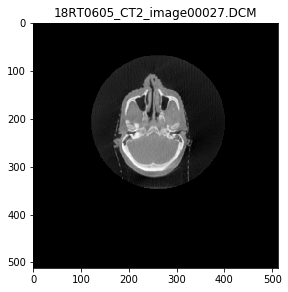

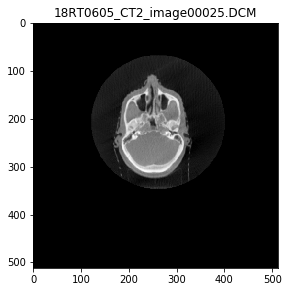

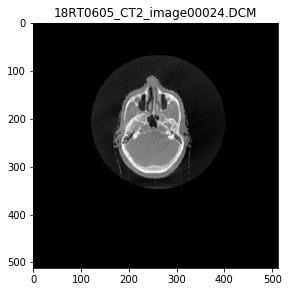

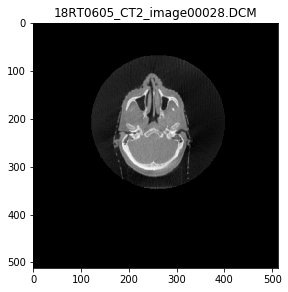

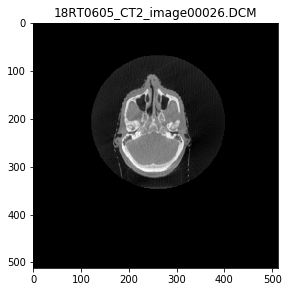

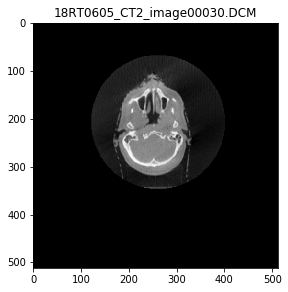

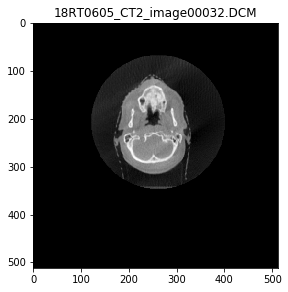

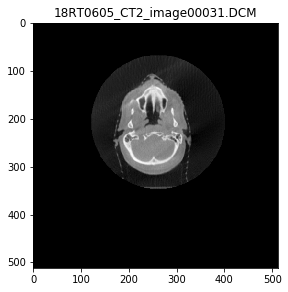

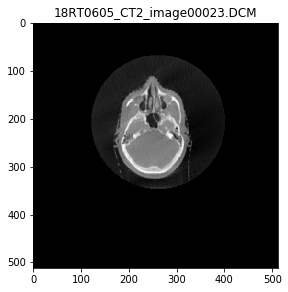

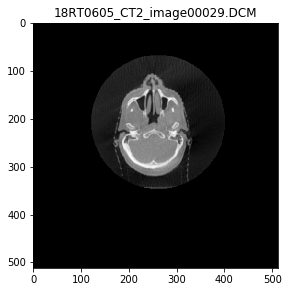

In [0]:
path = '/content/drive/My Drive/Project_old'
folder = os.fsencode(path)
for file in os.listdir(folder):
  
  filename = os.fsdecode(file)
  
  ds=pydicom.dcmread(path+'/'+filename,force=True)
  ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
  image=ds.pixel_array

  #image=ds.pixel_arrayimage = rescale(image, scale=0.4, mode='reflect', multichannel=False)

  fig, (ax1) = plt.subplots(1, 1, figsize=(8, 4.5))

  ax1.set_title(filename)
  ax1.imshow(image, cmap=plt.cm.Greys_r)

Renaming DCM files to the format i.DCM

In [0]:

path = '/content/drive/My Drive/Project_old'

folder = os.fsencode(path)
i=0;
filenames=[os.fsdecode(f) for f in os.listdir(folder)]
filenames.sort()
print(filenames)
i=0
for file in filenames:
  src=os.fsencode(path+'/'+file)
  dest=os.fsencode(path+'/'+str(i)+'.DCM')
  os.rename(src,dest)
  i=i+1

['Project_old0.DCM', 'Project_old1.DCM', 'Project_old2.DCM', 'Project_old3.DCM', 'Project_old4.DCM', 'Project_old5.DCM', 'Project_old6.DCM', 'Project_old7.DCM', 'Project_old8.DCM', 'Project_old9.DCM']



DICOM -> Radon Transform -> SART Reconstruction


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  
/usr/local/lib/python3.6/dist-packages/skimage/transform/radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


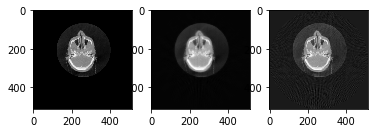

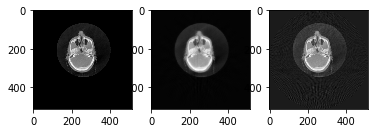

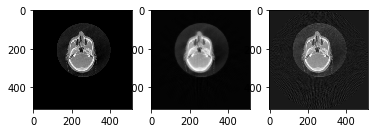

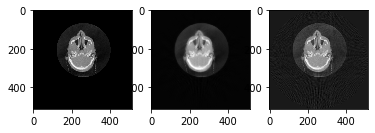

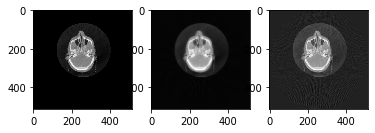

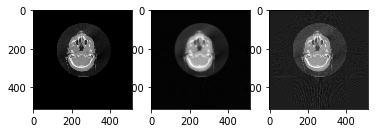

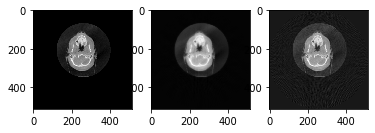

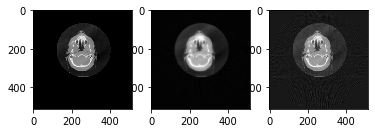

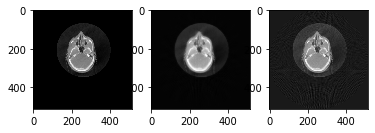

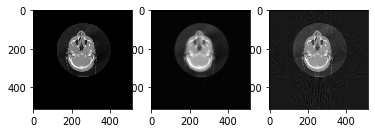

In [0]:
path1 = '/content/drive/My Drive/Project_old'

downfactor= 100 # Number of angles taken
folder = os.fsencode(path1+'/Original')

for file in os.listdir(folder):
  filename = os.fsdecode(file)

  ds=pydicom.dcmread(path1+'/Original/'+filename,force=True)
  ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
  image=ds.pixel_array

  theta = np.linspace(0., 180., downfactor, endpoint=False)
  sinogram = radon(image, theta=theta)
  sart=iradon_sart(sinogram, theta=theta)
  fbp=iradon(sinogram,theta=theta)
  fig,( ax1,ax2,ax3)=plt.subplots(1,3)
  ax1.imshow(image, cmap=plt.cm.Greys_r)
  ax2.imshow(sart, cmap=plt.cm.Greys_r)
  ax3.imshow(fbp, cmap=plt.cm.Greys_r)
  imsave(path1+'/SparseRecon/'+filename[:-3]+'jpg',sart)
  
  




Loading Images

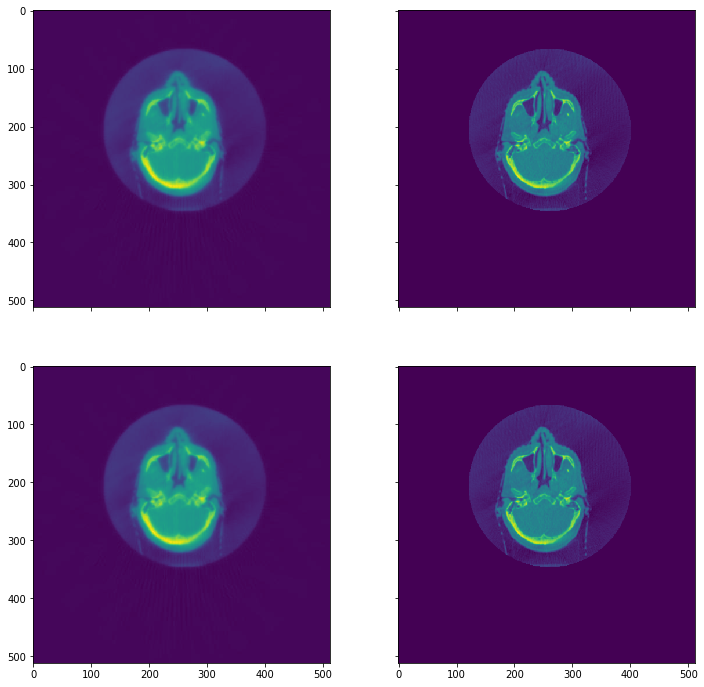

In [0]:


class ImageGenerator(keras.utils.Sequence):
    def __init__(self, list_IDs, data_dir, batch_size = 32, x_dim=(512,512,1), y_dim=(512,512,1), shuffle=True):
        self.list_IDs = list_IDs
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.shuffle = shuffle
        self.on_epoch_end()
    
    def __len__(self):
        return int(np.floor(len(self.list_IDs)/self.batch_size))
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    def __getitem__(self, index):
        batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        batch_IDs = [self.list_IDs[k] for k in batch_indexes]
        
        X, Y = self.__batch_data_generation(batch_IDs)
        
        return X,Y
    
    def __batch_data_generation(self, batch_IDs):
        X = np.empty((self.batch_size, *self.x_dim)) #* is used to unpack the self.dim tuple
        Y = np.empty((self.batch_size, *self.y_dim))
        
        for i, ID in enumerate(batch_IDs):
            X[i,:], Y[i,:] = self.load_mat(ID)
            
        return X,Y
    
    def load_mat(self, ID):
        filename =  str(ID)
        ds=pydicom.dcmread(self.data_dir+'/Original/'+filename + '.DCM',force=True)
        ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
        image=ds.pixel_arrayimages
        
        sart=imread(self.data_dir+'/SparseRecon/'+filename+'.jpg',0)

        x = np.reshape(sart, self.x_dim)
        y = np.reshape(image, self.y_dim)


        return x,y

if __name__ == '__main__':
    path = '/content/drive/My Drive/Project_old/'
    generator = ImageGenerator(list(np.arange(1, 11)), path)
    generator.load_mat(5)

Training Images

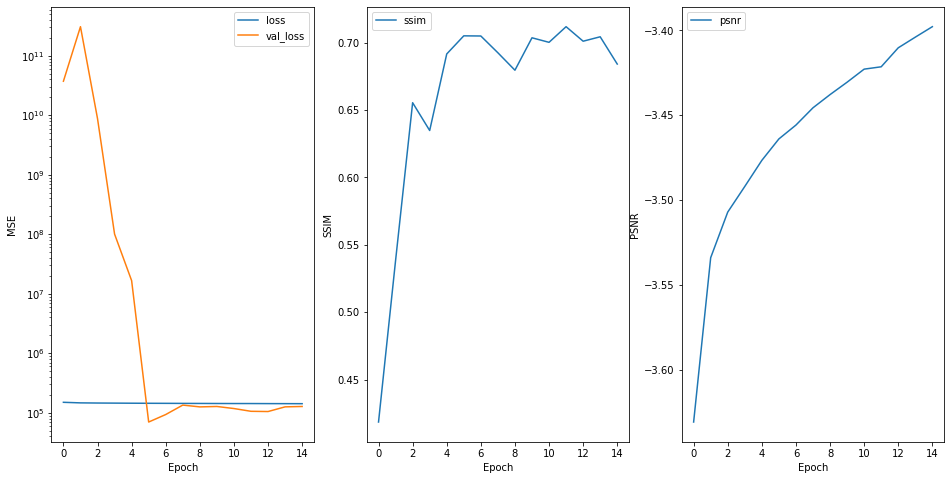

3/3 [==============================] - 3s 929ms/step - loss: 142248.0365 - ssim_loss: 0.6840 - psnr: -3.3979 - val_loss: 127685.1250 - val_ssim_loss: 0.0408 - val_psnr: -2.9297


In [0]:
path = '/content/drive/My Drive/Project_old/'

train_IDs = list(np.arange(0, 6))
val_IDs = list(np.arange(6, 10))
train_generator = ImageGenerator(train_IDs, path, batch_size = 2)
val_generator = ImageGenerator(val_IDs, path, batch_size = 2)

#tbCallBack = keras.callbacks.TensorBoard(log_dir = path+'TestTraining/logs', write_graph = True, write_images = True) #Tensorboard callback
#checkpoint_path = path+'TestTraining/checkpoints/test_cp.ckpt'
#cpCallBack = keras.callbacks.ModelCheckpoint(checkpoint_path) #checkpoints callBack

model = UNet((512,512,1))
#model.summary()
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = [ssim_loss,psnr])
model.fit_generator(train_generator, epochs = 15, validation_data = val_generator,
                    workers = 6, callbacks = [plot])#,tbCallBack, cpCallBack])

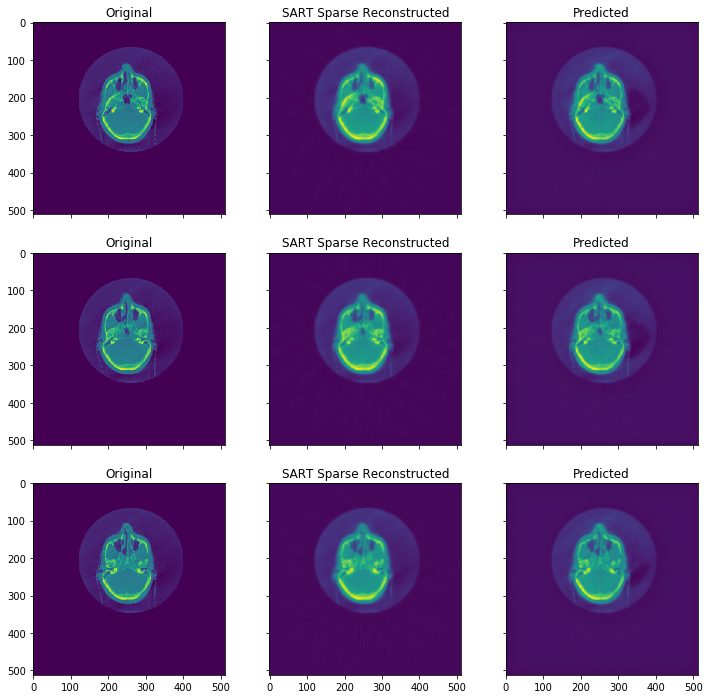

In [0]:

path = '/content/drive/My Drive/Project_old/'

import matplotlib.pyplot as plt

n=3
gen=ImageGenerator(np.arange(1,n+1),path, batch_size = 1)

fig,ax=plt.subplots(n,3,figsize=(12,12),sharex=True,sharey=True)

i=1
while(i<n+1):
  lrecon1,gt=gen.load_mat(i)

 
  pre=model.predict([[lrecon1]])
  
  ax[i-1][0].imshow(np.squeeze(gt))
  ax[i-1][0].set_title('Original')


  ax[i-1][1].imshow(np.squeeze(lrecon1))
  ax[i-1][1].set_title('SART Sparse Reconstructed')

  ax[i-1][2].imshow(np.squeeze(pre))
  ax[i-1][2].set_title('Predicted')
  i=i+1


plt.savefig(path+'images.png')
plt.show()